In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data from https://ember-energy.org/data/european-wholesale-electricity-price-data/
data = pd.read_csv('all_countries.csv')
data['Datetime (UTC)'] = pd.to_datetime(data['Datetime (UTC)'], format='%Y-%m-%d %H:%M:%S')
data = data.set_index('Datetime (UTC)')

In [3]:
data.Country.unique()

array(['Austria', 'Belgium', 'Czechia', 'Denmark', 'Estonia', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'Italy', 'Latvia',
       'Lithuania', 'Luxembourg', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'United Kingdom', 'Bulgaria', 'Serbia', 'Croatia',
       'Montenegro', 'North Macedonia', 'Ireland'], dtype=object)

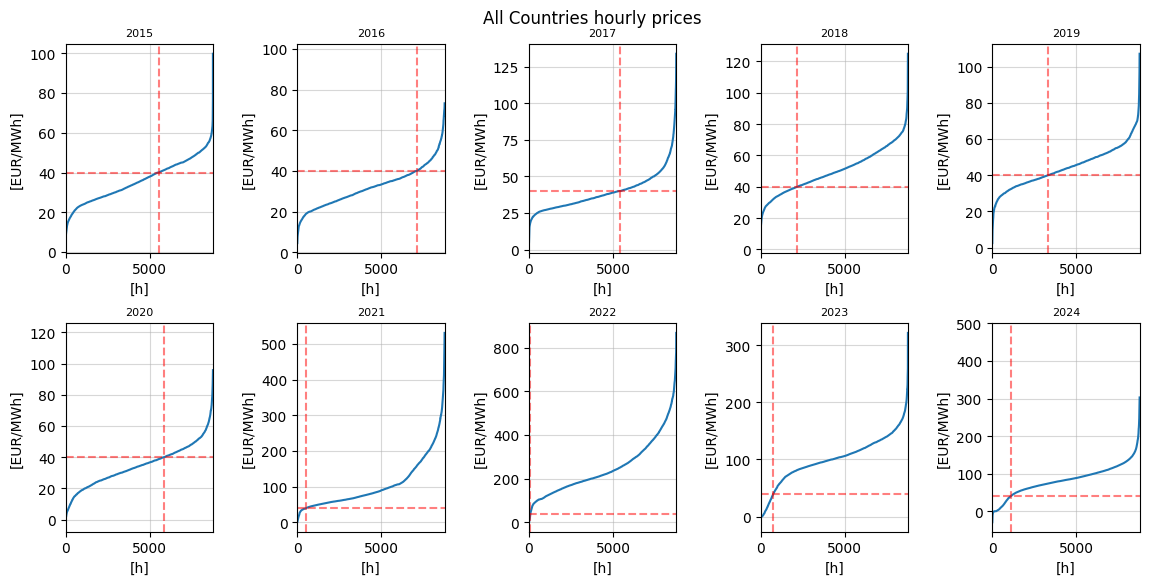

In [7]:
country = 'All Countries'
hourly_price = data.loc[data['Country'] == country, 'Price (EUR/MWhe)']
if country == 'All Countries':
    hourly_price = data['Price (EUR/MWhe)'].resample('h').median()

years = hourly_price.index.year.unique().drop(2025).values

fig, axs = plt.subplots(2, 5, figsize=(12, 6))

fig.tight_layout(pad=3.0)

for ix, year in enumerate(years):
    ax = axs[ix//5, ix%5]
    price_data = hourly_price[hourly_price.index.year == year]
    if len(price_data) < 8760:
        continue
    p = np.sort(hourly_price[hourly_price.index.year == year].values)
    t = np.argwhere(p > 40)[0][0]
    ax.plot(p)
    ax.axvline(t, color='r', linestyle='--', alpha=0.5)
    ax.axhline(40, color='r', linestyle='--', alpha=0.5)
    ax.set_title(year, fontsize=8)
    ax.grid(alpha=0.5)
    ax.set_xlabel('[h]')
    ax.set_ylabel('[EUR/MWh]')
    ax.set_xlim(0, 8760)
plt.suptitle(f'{country} hourly prices')
plt.show()

In [5]:
hourly_price[hourly_price.index.year == 2015]

Datetime (UTC)
2015-01-01 00:00:00    31.816667
2015-01-01 01:00:00    29.757917
2015-01-01 02:00:00    27.753750
2015-01-01 03:00:00    26.560833
2015-01-01 04:00:00    26.623750
                         ...    
2015-12-31 19:00:00    34.157917
2015-12-31 20:00:00    31.568333
2015-12-31 21:00:00    32.170417
2015-12-31 22:00:00    31.415833
2015-12-31 23:00:00    29.067500
Freq: h, Name: Price (EUR/MWhe), Length: 8760, dtype: float64

In [6]:
data_price = data_price.iloc[3:,1] * 1000
data_co2 = data_co2.iloc[1:,0]
co2_flux = data_co2.values
price = data_price.values

NameError: name 'data_price' is not defined

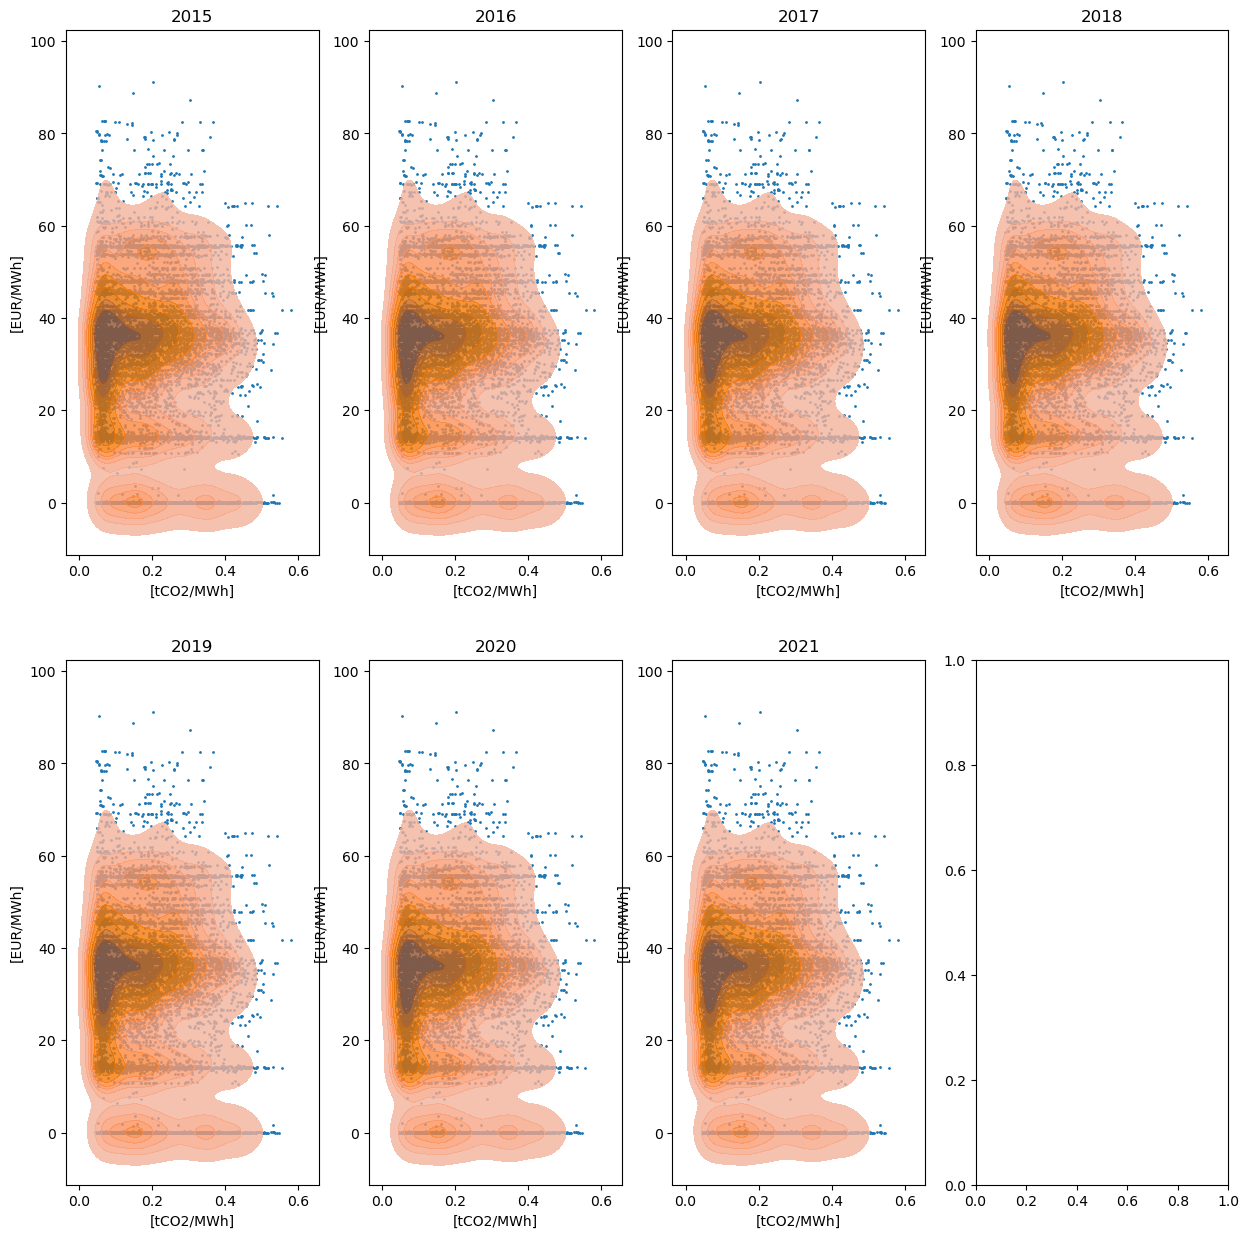

In [ ]:
years = ['2015', '2016', '2017', '2018', '2019', '2020', '2021']
fig, axs = plt.subplots(2, 4, figsize=(15, 15))
co2 = []
price = []
for ix, year in enumerate(years):
    data_price = pd.read_excel(year + '.xlsx', sheet_name='Price', skiprows=5, index_col=0)
    data_co2 = pd.read_excel(year + '.xlsx', sheet_name='CO2', skiprows=3, index_col=0)

    data_price = data_price.iloc[3:,1] * 1000
    data_co2 = data_co2.iloc[1:,0]
    co2_year = data_co2.values
    price_year = data_price.values
    co2.append(co2_year)
    price.append(price_year)
    ax = axs[ix//4, ix%4]
    ax.scatter(co2_year, price_year, s=1)
    sns.kdeplot(x = co2_year, y = price_year, fill=True, alpha=0.8, ax = ax)
    ax.set_title(year)
    ax.set_xlabel('[tCO2/MWh]')
    ax.set_ylabel('[EUR/MWh]')


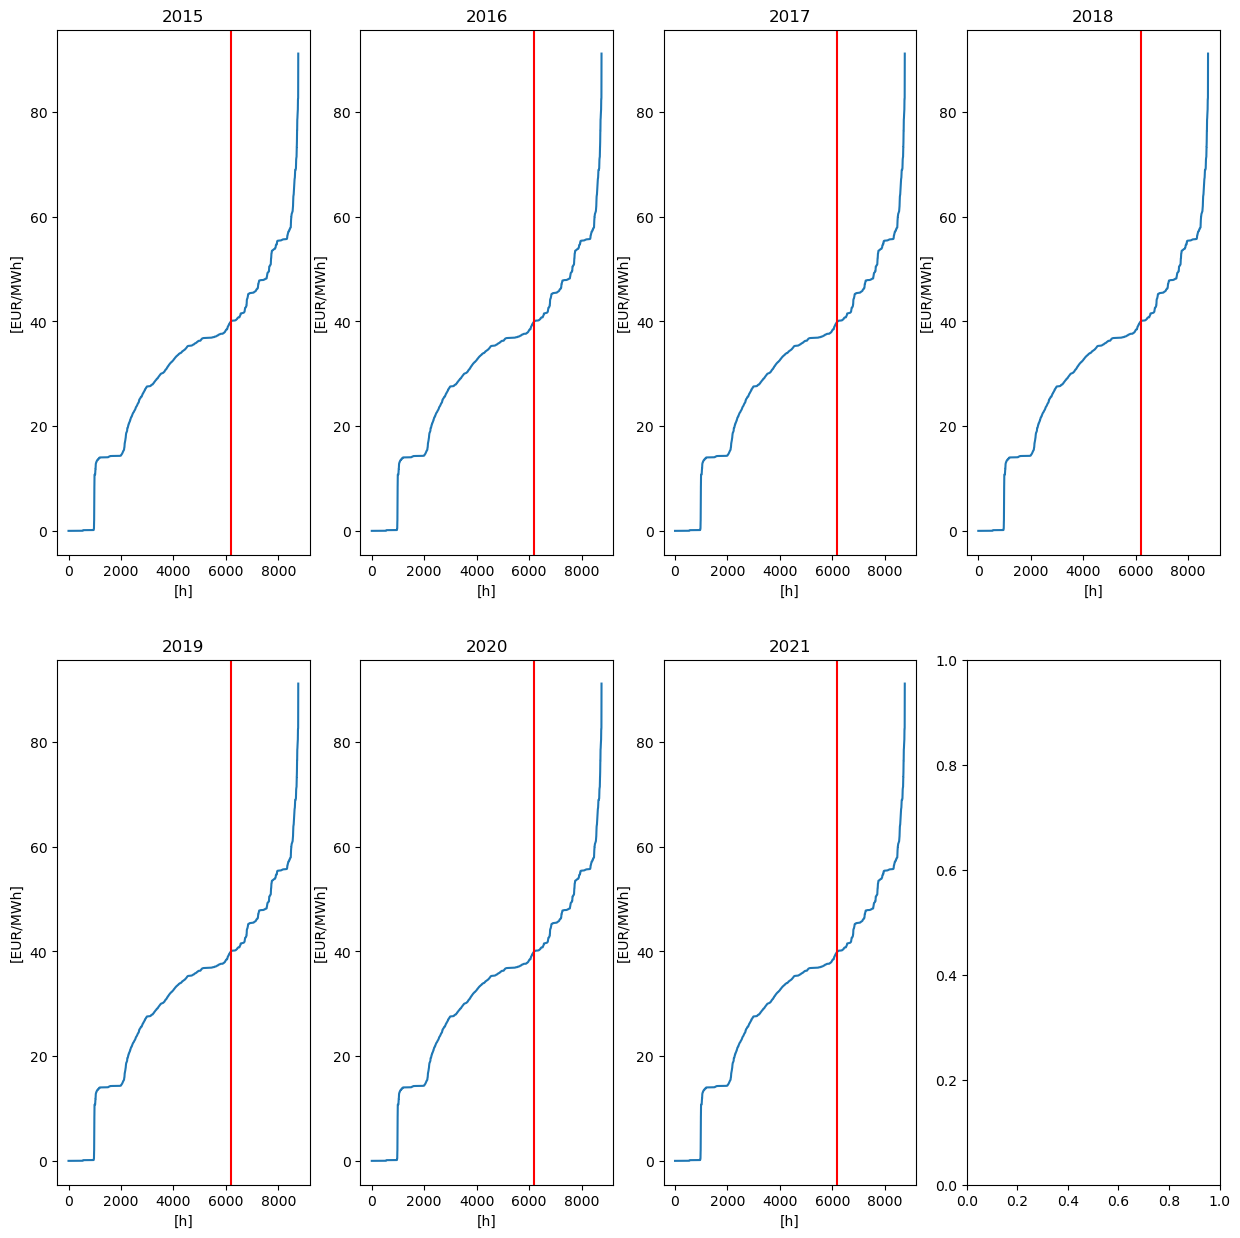

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(15, 15))

for ix, year in enumerate(years):
    ax = axs[ix//4, ix%4]
    p = np.sort(price[ix])
    t = np.argwhere(p > 40)[0][0]
    ax.plot(p)
    ax.axvline(t, color='r')
    ax.set_title(year)
    ax.set_xlabel('[h]')
    ax.set_ylabel('[EUR/MWh]')

In [ ]:
p = np.sort(price[0])

In [ ]:
t = np.argwhere(p > 40)

In [ ]:
t[0][0]


6193